## Importations

In [39]:
## for plotting figures :
import matplotlib.pyplot as plt
from matplotlib import rc
import sys
sys.path.append('../')


import os
import csv
import pandas as pd


rc('font', family='sans-serif', size = 7)
rc('figure', dpi= 700)
rc(('xtick', 'ytick'), labelsize = 7)
rc('legend', fontsize=6)
rc('lines', linewidth = 1)
rc('axes', linewidth = 0.5, labelsize =8)
rc('legend', handlelength = 2)

In [20]:
df = pd.read_excel('../tables/data/data_FIA_method_analysis.xlsx')

In [21]:
df

,Species,name,DSD-PBEP86_Def2QZVPP,DSD-PBEP86_aug-cc-pVTZ,M052X_6-31Gd,M062X_6-31Gd,CCSD_T_cc-pVQZ,CCSD_T_aug-cc-pVQZ,Ref. data
0,BH3,$BH_3$,272.380932,273.930513,243.418048,249.748935,275.851795,0.000000,279.3
1,BF3,$BF_3$,344.904586,359.650786,319.878375,317.147225,372.577631,0.000000,346.2
2,BCl3,$BCl_3$,0.000000,0.000000,418.524354,421.754977,0.000000,0.000000,403.8
3,BBr3,$BBr_3$,0.000000,0.000000,440.294687,433.877752,0.000000,0.000000,428.2
4,BI3,$BI_3$,0.000000,0.000000,467.759333,467.270394,0.000000,0.000000,446.2
5,B_NH2_3,$B(NH_2)_3$,0.000000,0.000000,91.642456,99.049097,0.000000,0.000000,119.6
6,BOH3,$B(OH)_3$,163.028105,194.641717,179.768927,179.126788,199.089223,0.000000,190.1
7,BSH3,$B(SH)_3$,0.000000,0.000000,317.678865,322.438186,0.000000,0.000000,308.5
8,BMe3,$B(Me)_3$,229.292701,242.936456,219.652901,231.911674,0.000000,0.000000,247.9
9,BPh3,$B(Ph)_3$,0.000000,0.000000,305.202375,314.166726,0.000000,0.000000,319.8


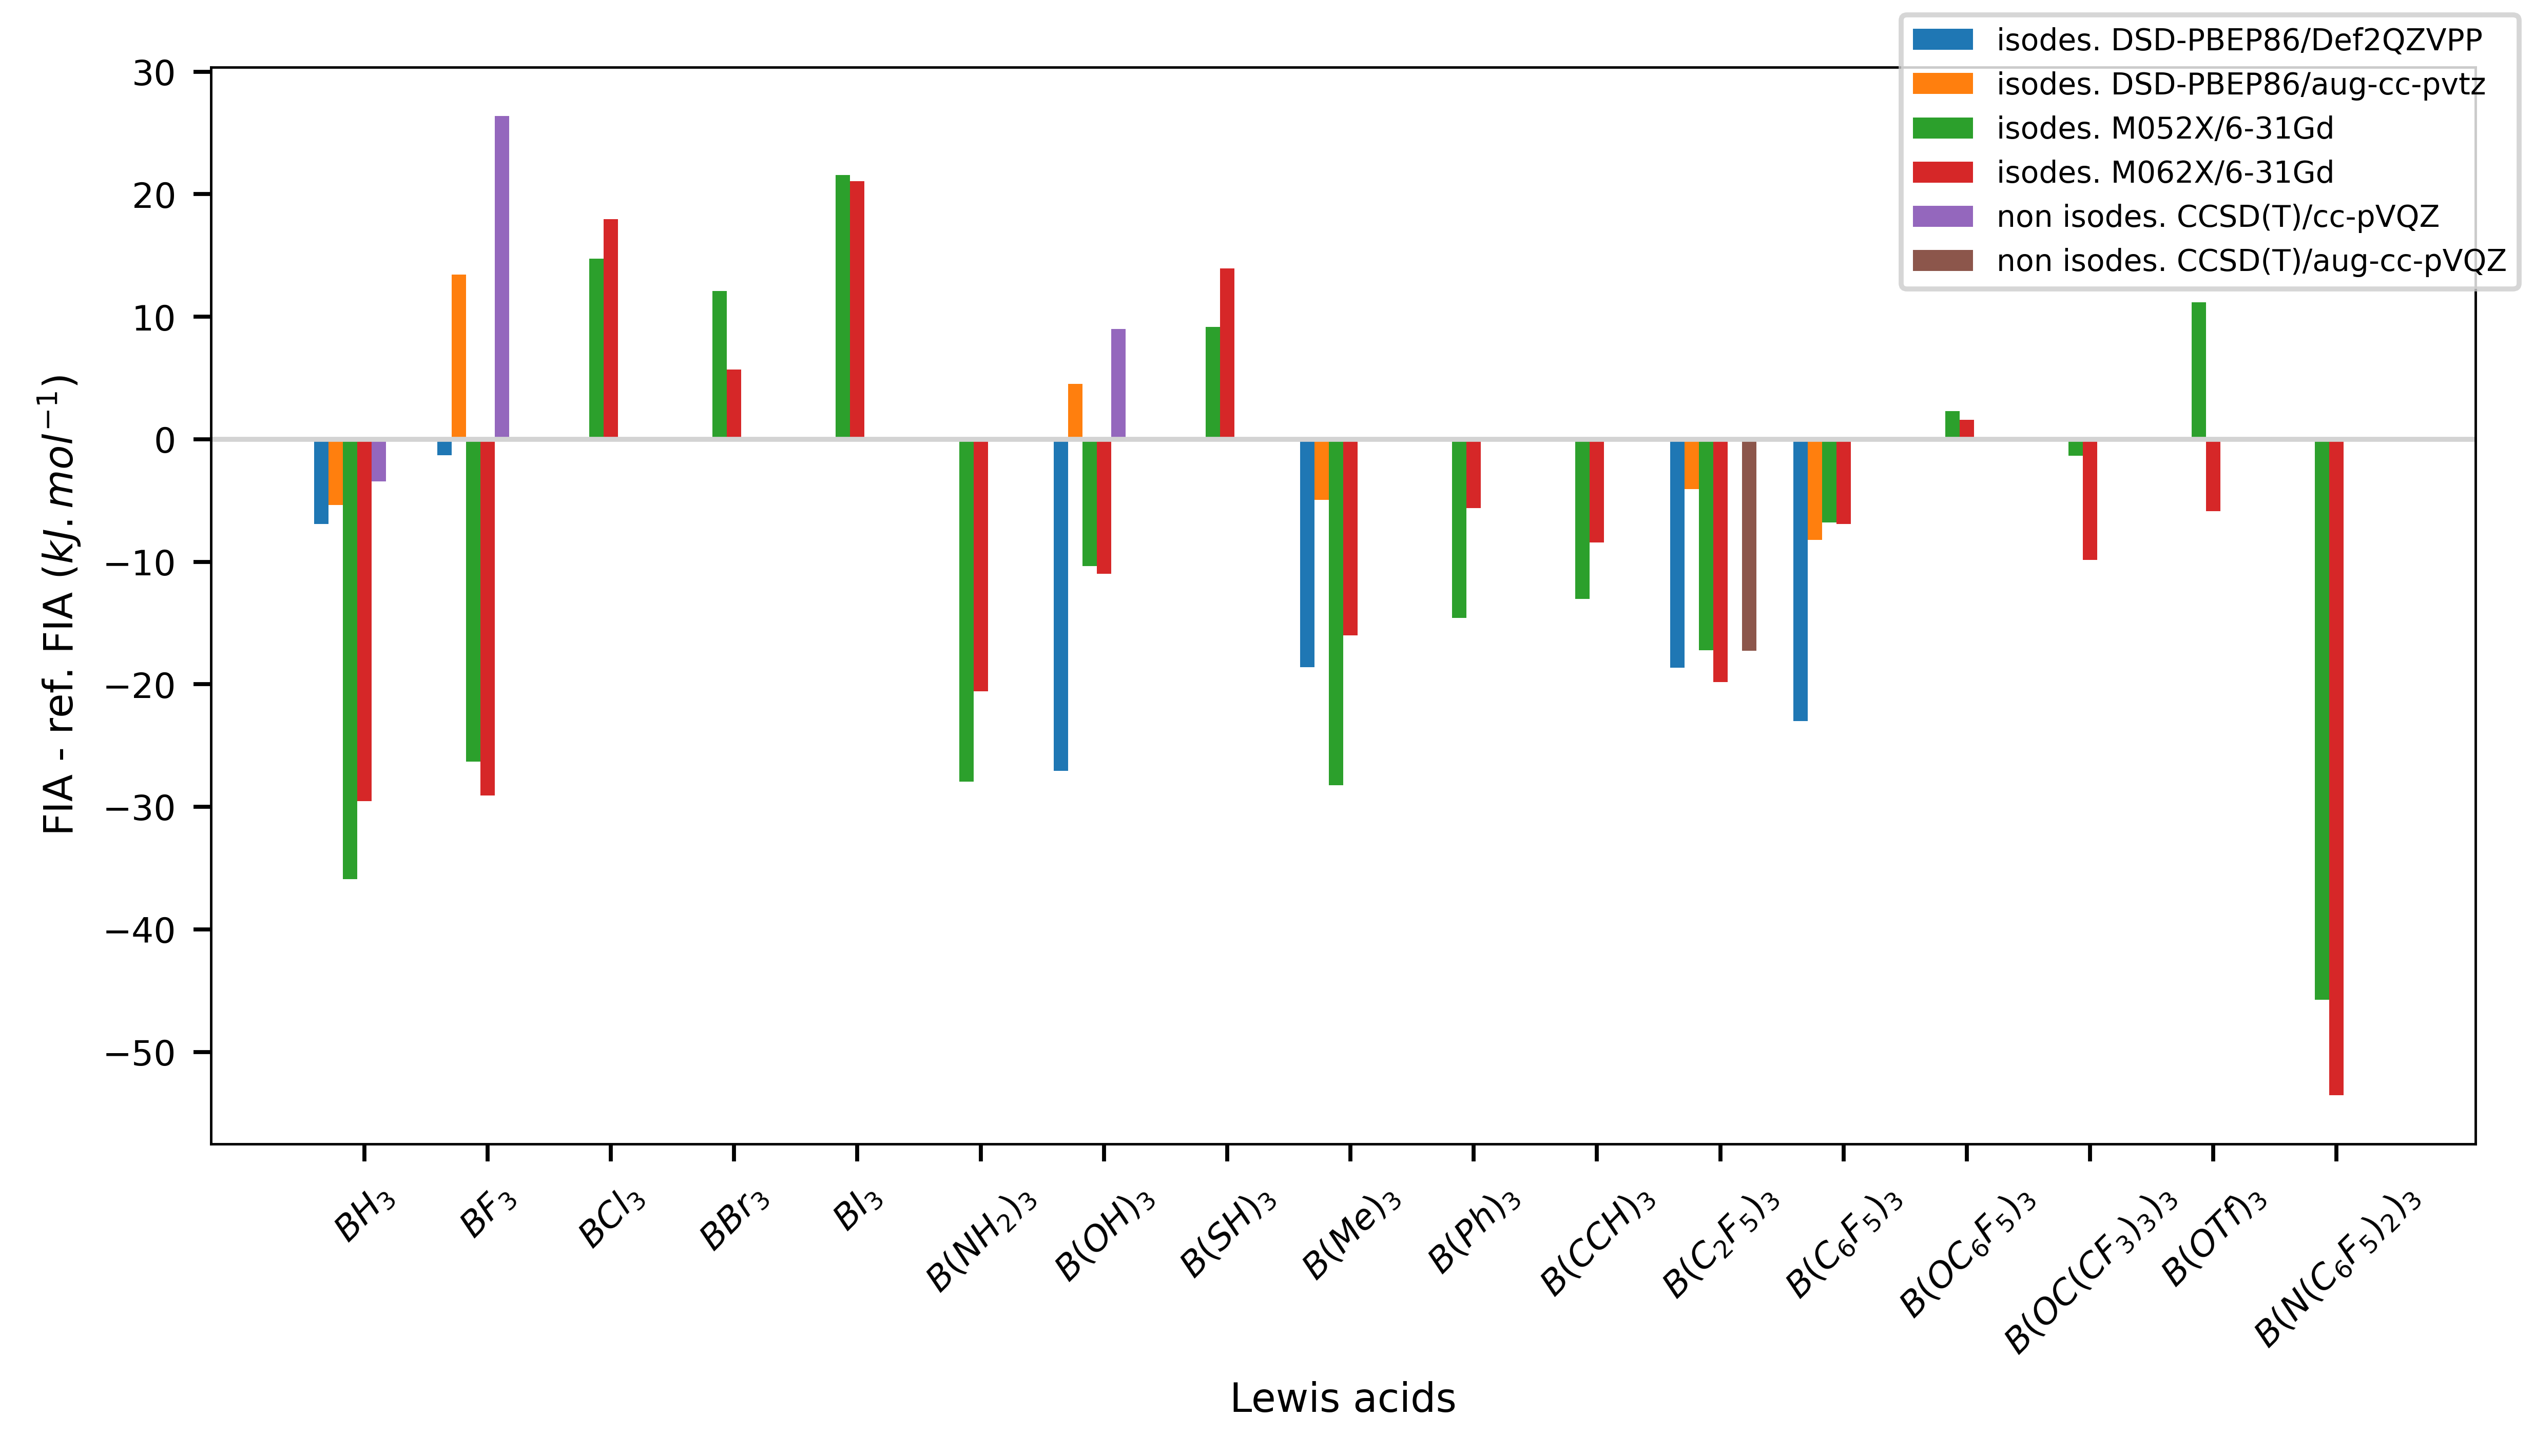

In [28]:
methods = list(df.columns[2:-1])

labels_meth = ['isodes. DSD-PBEP86/Def2QZVPP', 'isodes. DSD-PBEP86/aug-cc-pvtz', 'isodes. M052X/6-31Gd', 'isodes. M062X/6-31Gd', 'non isodes. CCSD(T)/cc-pVQZ', 'non isodes. CCSD(T)/aug-cc-pVQZ', 'Ref. data']
N = len(methods)
width = 0.7/N

fig = plt.figure(figsize = (7,4))
ax =  fig.subplots()

fia_ref = list(df['Ref. data'])
mols = list(df["Species"])

for n in range(N) :  
    meth = methods[n]
    
   
    fia = list(df[meth])
    delta_fia = []
    for i in range(len(fia)):
        #print(i)
        if fia[i]==0:
            delta_fia.append(0)
        else : 
            delta_fia.append(fia[i]-fia_ref[i])
        
    num = list(range(len(fia)))
    
    
    axis = lambda x : x - width * ((N)/2 - n)
    
    #print(num, fia)
    #ax.plot(num, fia, ls = 'none', marker = 'o')
    cbar = ax.bar(list(map(axis, num)), delta_fia, width = width)
    cbar.set_label(labels_meth[n])
    
ax.set_xticks(num)
ax.set_xticklabels(df['name'])
plt.xticks(rotation=45)
ax.axhline(y=0, color='lightgrey', linestyle='-')


ax.set_xlabel('Lewis acids')
ax.set_ylabel('FIA - ref. FIA ($kJ.mol^{-1}$)')

fig.legend()
fig.tight_layout()

fig.savefig('../results/FIA_computation/delta_FIA_method.png', format = 'png', transparent= True, facecolor='white', bbox_inches='tight')

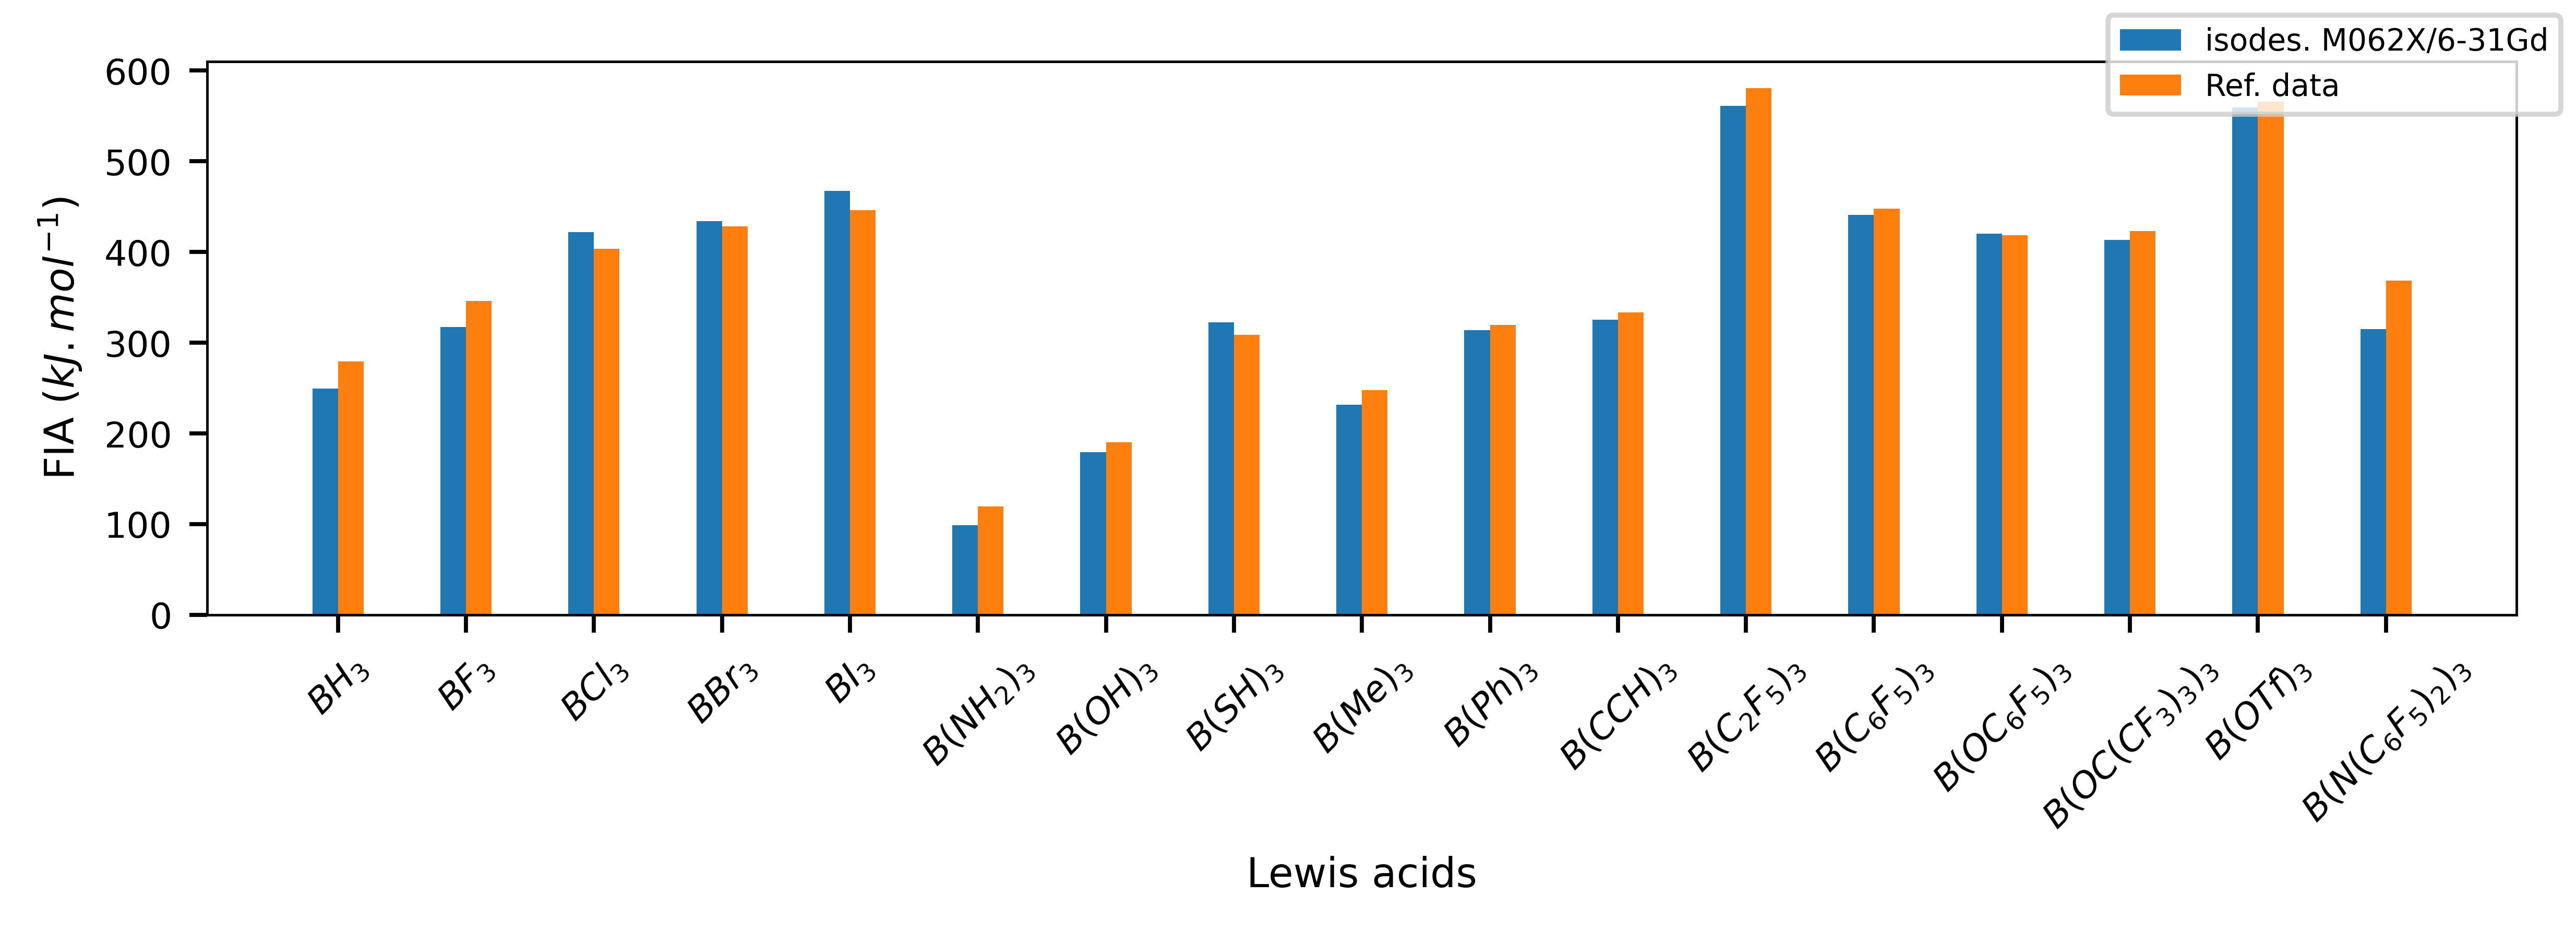

In [33]:
from matplotlib import rc
import matplotlib.pyplot as plt

##Initiate



fig = plt.figure(figsize = (7, 2.5))
ax =  fig.subplots()

fia = list(df["M062X_6-31Gd"])
mols = list(df["name"])
num = list(range(len(fia)))

width = 0.2

axis = lambda x : x - width * (1/2 - (n))
n=0

ax.bar(list(map(axis, num)), fia, label = "isodes. M062X/6-31Gd", width = 0.2)
n=1
ax.bar(list(map(axis, num)), fia_ref, label = "Ref. data", width = 0.2)

    #print(num, fia)
    #ax.plot(num, fia, ls = 'none', marker = 'o')
    #cbar = ax.bar(list(map(axis, num)), delta_fia, width = width)
    #cbar.set_label(meth)
    
ax.set_xticks(num)
ax.set_xticklabels(mols, rotation = 45)

ax.set_xlabel('Lewis acids')
ax.set_ylabel('FIA ($kJ.mol^{-1}$)')

fig.legend()
fig.tight_layout()

fig.savefig('../results/FIA_computation/data_FIA_M06.png', format = 'png', transparent= True, bbox_inches='tight')

In [36]:
labels_meth = { 'DSD-PBEP86_Def2QZVPP' : 'isodes. DSD-PBEP86/Def2QZVPP', 'DSD-PBEP86_aug-cc-pVTZ':
 'isodes. DSD-PBEP86/aug-cc-pvtz',
 'M052X_6-31Gd' :'isodes. M052X/6-31Gd',
 'M062X_6-31Gd' : 'isodes. M062X/6-31Gd',
 'CCSD_T_cc-pVQZ' : 'non isodes. CCSD(T)/cc-pVQZ',
 'CCSD_T_aug-cc-pVQZ' : 'non isodes. CCSD(T)/aug-cc-pVQZ'}

fit coefficients : slope =  1.0004320569752023 intercept =  -16.07244233747712
R2 = 0.9953664461810517
MAE = 7.88671695827242



fit coefficients : slope =  0.9841903408648859 intercept =  4.743440320081909
R2 = 0.9969349035781894
MAE = 5.781886912136291



fit coefficients : slope =  1.0748388985219197 intercept =  -36.61778775833741
R2 = 0.9822936217902828
MAE = 13.415349032300584



fit coefficients : slope =  1.034384497827632 intercept =  -21.770321208950225
R2 = 0.9787723757123619
MAE = 13.103303171974304





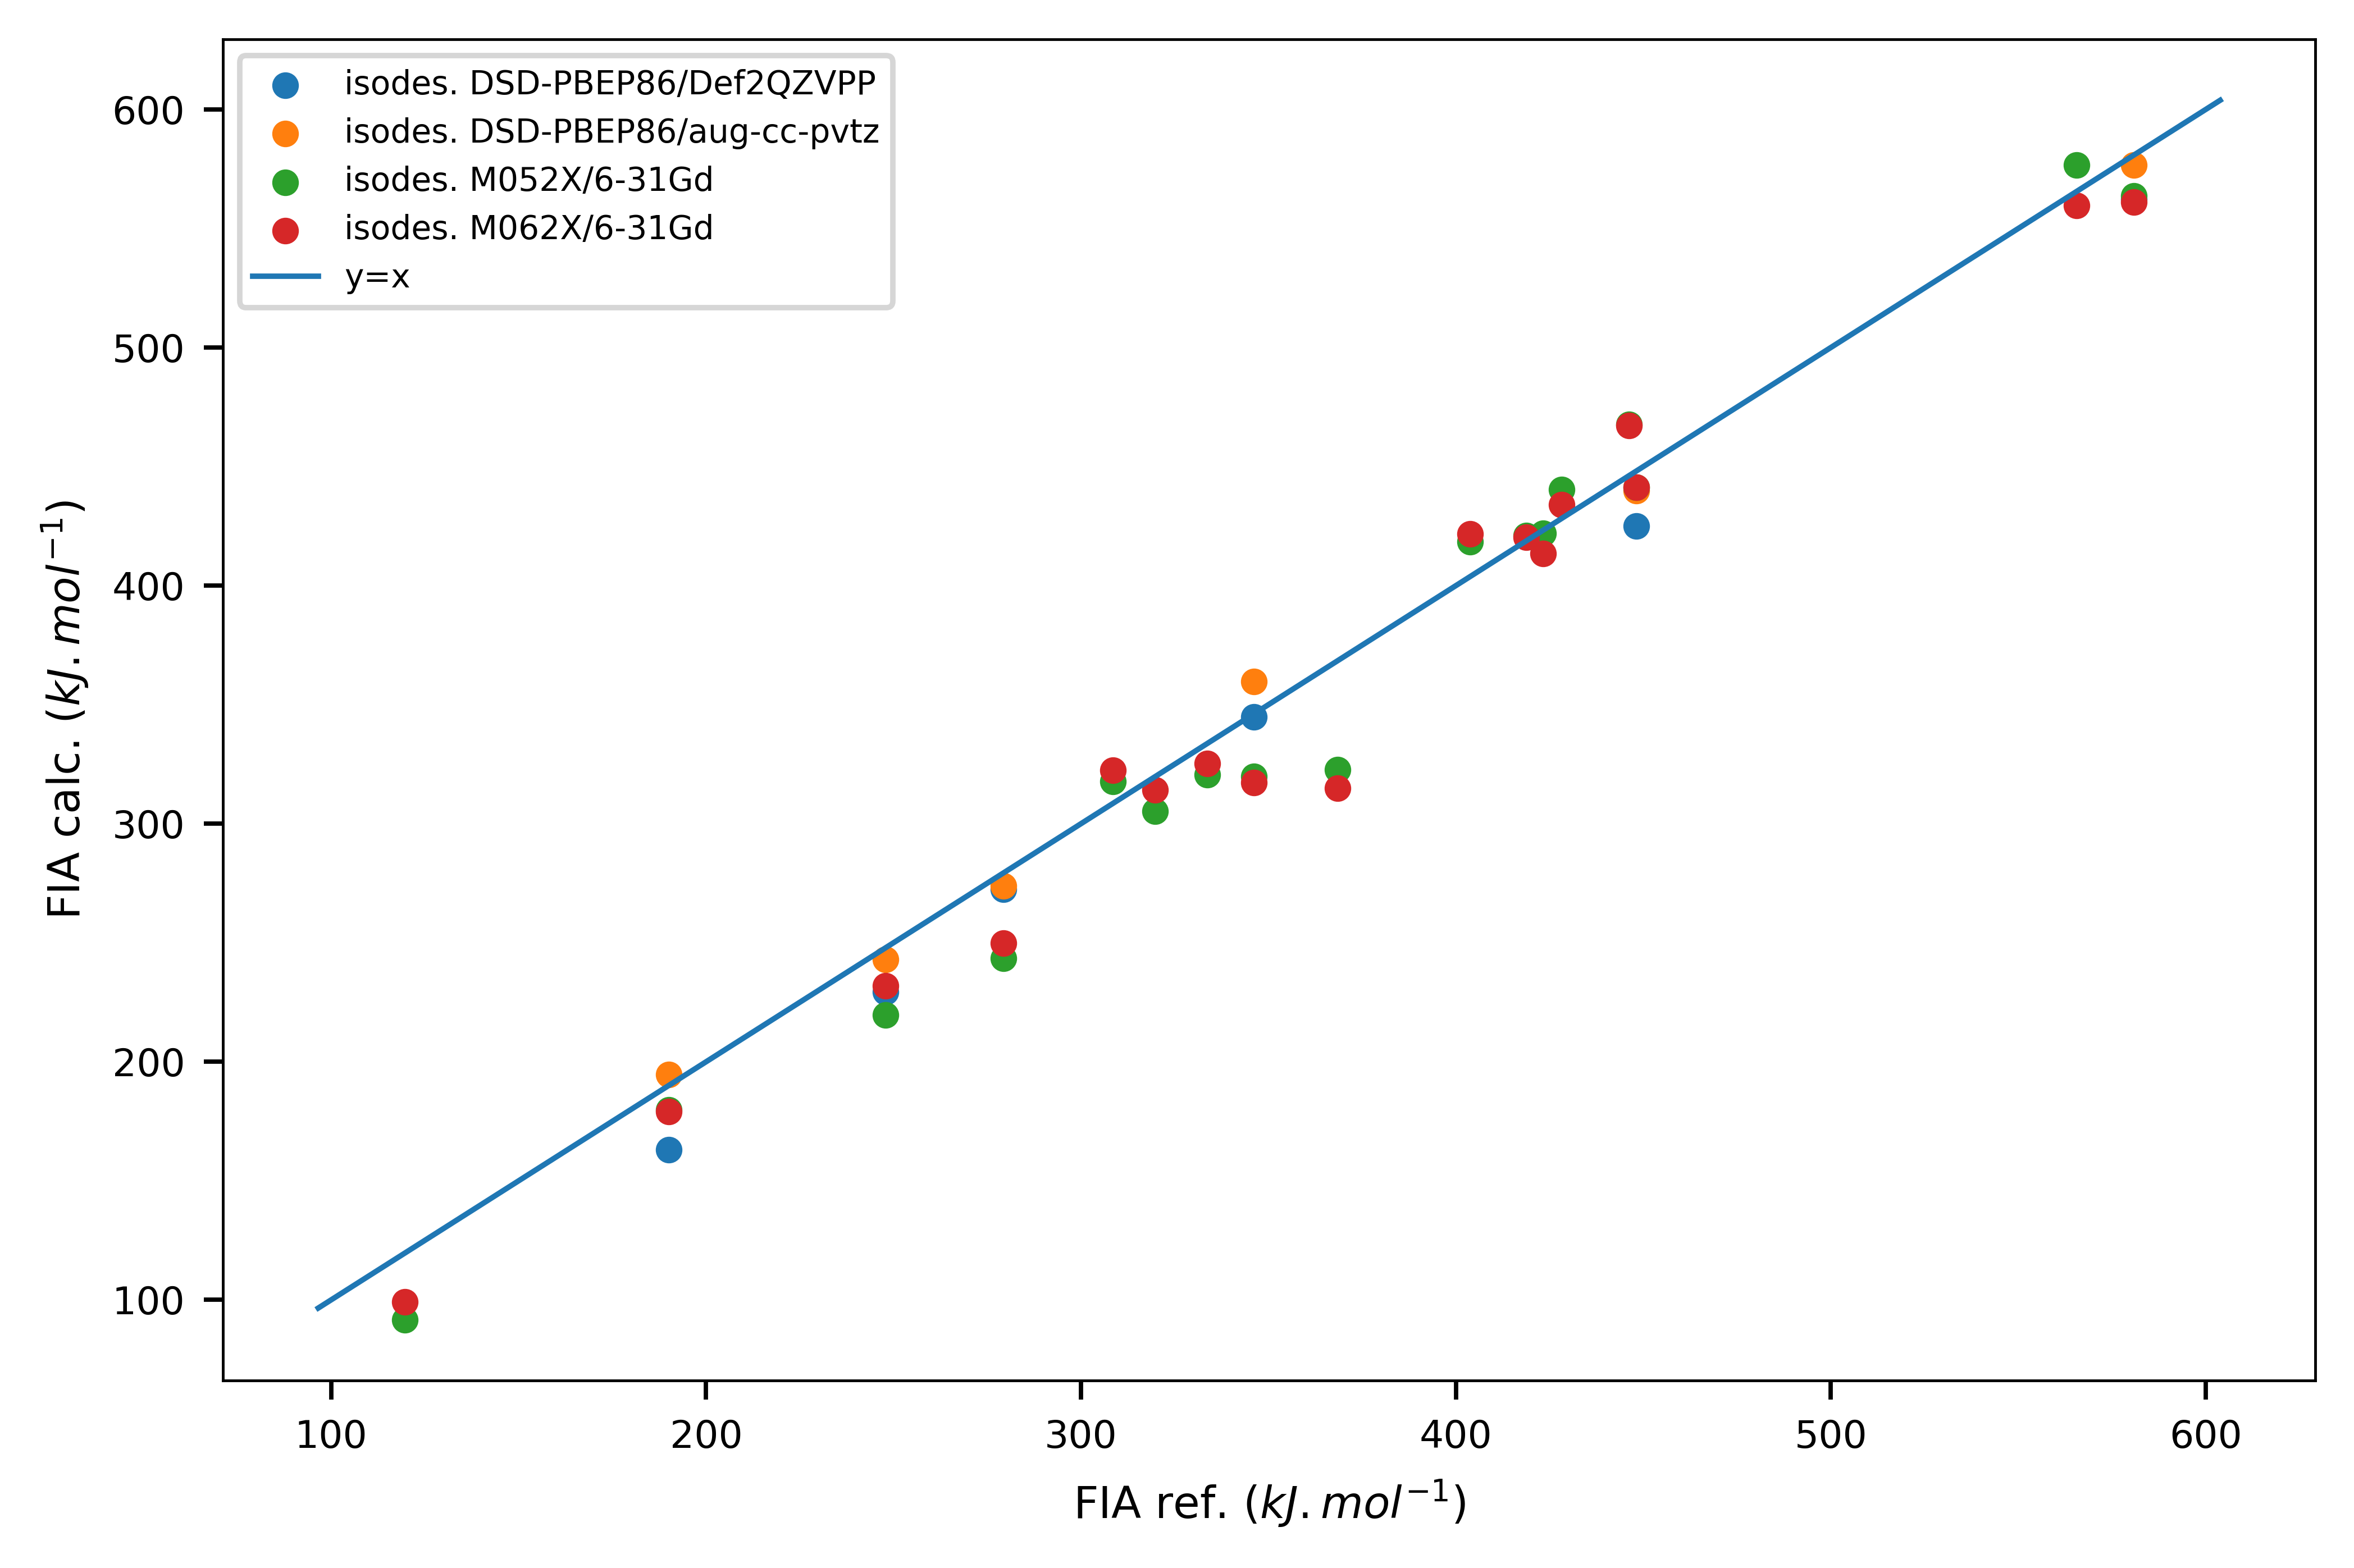

In [46]:
from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

##Initiate


remove =['CCSD_T_cc-pVQZ', 'CCSD_T_aug-cc-pVQZ']
methods = list(df.columns)[2:-1]
fields = ['Method']+methods
rows = [['slope'], ['intercept'], ['R2'], ['MAE']]

def Replace(x) :
    if x==0 :
        return None
    else: 
        return x


fig = plt.figure(figsize = (6, 4)) 
ax =  fig.subplots() 

fia_ref = list(df['Ref. data'])
N = len(methods)
mols = list(df["Species"])

for n in range(N) :  
    meth = methods[n]
    if meth not in remove :   
       
        fia = list(df[meth])
        fia = list(map(Replace, fia))
        num = list(range(len(fia)))

        pts = plt.scatter(x=fia_ref, y=fia, s=15, label = labels_meth[meth])
        #set_label(labels[n])
        #np.polyfit(fia_ref, fia, 1,rcond=None, full=False, w=None, cov=False)
        fia_values = []
        fia_ref_values = []
        for i in range(len(fia)):
            if type(fia[i]) == float : 
                fia_values.append(fia[i])
                fia_ref_values.append(fia_ref[i])
        #print(fia_values)
        #print(fia_ref_values)
        z = np.polyfit(fia_ref_values, fia_values, 1)
        print("fit coefficients :", 'slope = ', z[0], "intercept = ", z[1])
        rows[0].append(round(z[0],2))
        rows[1].append(round(z[1],2))
        p = np.poly1d(z)
        R2 = r2_score(fia_values, p(fia_ref_values))
        print("R2 =", R2)
        rows[2].append(round(R2,3))
        MAE = mean_absolute_error(fia_values, p(fia_ref_values))
        rows[3].append(round(MAE,2))
        print("MAE =", MAE)    
        print("\n\n")

xlims = ax.get_xlim()
ax.plot(xlims, xlims, label = "y=x")

ax.set_xlabel('FIA ref. ($kJ.mol^{-1}$)')
ax.set_ylabel('FIA calc. ($kJ.mol^{-1}$)')

ax.legend(loc = "best")
fig.tight_layout()

#fig.savefig('figures/fit_fia_methods.svg', facecolor = 'white', transparent = False, format = 'svg')
#fig.savefig('fit_fia_methods.png', facecolor = 'white', transparent = False, format = 'png')

filename = "../results/FIA_computation/fit_table.csv"

with open(filename,'w',newline = '') as csvfile :
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(fields)
    csvwriter.writerows(rows)
    
fig.savefig('../results/FIA_computation/fit_FIA_methods.png', format = 'png', transparent= True, bbox_inches='tight')

In [47]:
df_fit = pd.read_csv('../results/FIA_computation/fit_table.csv')
df_fit.to_excel('../results/FIA_computation/fit_table.xlsx')

In [49]:
df_fit

,Method,DSD-PBEP86_Def2QZVPP,DSD-PBEP86_aug-cc-pVTZ,M052X_6-31Gd,M062X_6-31Gd,CCSD_T_cc-pVQZ,CCSD_T_aug-cc-pVQZ
0,slope,1.000,0.980,1.070,1.030,NaN,NaN
1,intercept,-16.070,4.740,-36.620,-21.770,NaN,NaN
2,R2,0.995,0.997,0.982,0.979,NaN,NaN
3,MAE,7.890,5.780,13.420,13.100,NaN,NaN


In [51]:
methods = list(df.columns)[2:-1]
N= len(methods)

fields = ['Method']
row = ['MAE']
for n in range(N-1):
    meth = methods[n]
    fields.append(labels_meth[meth]) 
    fia = list(df[meth])
    fia_values = []
    fia_ref_values = []
    for i in range(len(fia)):
        if fia[i]!=0:
            fia_values.append(fia[i])
            fia_ref_values.append(fia_ref[i])
    #print(fia_values)
    #print(fia_ref_values)
    MAE = round(mean_absolute_error(fia_ref_values, fia_values),2)
    #print(MAE)
    row.append(MAE)
print(fields)
print(row)

filename = "MAE_table.csv"

with open(filename,'w',newline = '') as csvfile :
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(fields)
    csvwriter.writerow(row)
    
print(csvfile)

['Method', 'isodes. DSD-PBEP86/Def2QZVPP', 'isodes. DSD-PBEP86/aug-cc-pvtz', 'isodes. M052X/6-31Gd', 'isodes. M062X/6-31Gd', 'non isodes. CCSD(T)/cc-pVQZ']
['MAE', 15.92, 6.77, 17.56, 16.26, 12.94]
<_io.TextIOWrapper name='MAE_table.csv' mode='w' encoding='cp1252'>
